In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("unsdsn/world-happiness")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/world-happiness


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Grafikler için stil
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [4]:
# Her yılın verisini oku ve year sütunu ekle
df_2015 = pd.read_csv(path + "/2015.csv")
df_2015["year"] = 2015

df_2016 = pd.read_csv(path + "/2016.csv")
df_2016["year"] = 2016

df_2017 = pd.read_csv(path + "/2017.csv")
df_2017["year"] = 2017

df_2018 = pd.read_csv(path + "/2018.csv")
df_2018["year"] = 2018

df_2019 = pd.read_csv(path + "/2019.csv")
df_2019["year"] = 2019

# Tüm verileri birleştir
df_all = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

# Ana DataFrame'e kopyala
df = df_all.copy()

In [5]:
# Satır ve sütun sayısını kontrol et
print(f"Toplam gözlem sayısı: {df.shape[0]} satır, {df.shape[1]} sütun")

Toplam gözlem sayısı: 782 satır, 31 sütun


In [6]:
# İlk 5 satırı görüntüle
display(df.head())

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Sütun isimlerini satır satır yazdır
print("Sütunlar:")
for col in df.columns:
    print("-", col)

Sütunlar:
- Country
- Region
- Happiness Rank
- Happiness Score
- Standard Error
- Economy (GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)
- Generosity
- Dystopia Residual
- year
- Lower Confidence Interval
- Upper Confidence Interval
- Happiness.Rank
- Happiness.Score
- Whisker.high
- Whisker.low
- Economy..GDP.per.Capita.
- Health..Life.Expectancy.
- Trust..Government.Corruption.
- Dystopia.Residual
- Overall rank
- Country or region
- Score
- GDP per capita
- Social support
- Healthy life expectancy
- Freedom to make life choices
- Perceptions of corruption


In [8]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("[().]", "", regex=True)


In [9]:
# Sütun isimlerini satır satır yazdır
print("Sütunlar:")
for col in df.columns:
    print("-", col)

Sütunlar:
- country
- region
- happiness_rank
- happiness_score
- standard_error
- economy_gdp_per_capita
- family
- health_life_expectancy
- freedom
- trust_government_corruption
- generosity
- dystopia_residual
- year
- lower_confidence_interval
- upper_confidence_interval
- happinessrank
- happinessscore
- whiskerhigh
- whiskerlow
- economygdppercapita
- healthlifeexpectancy
- trustgovernmentcorruption
- dystopiaresidual
- overall_rank
- country_or_region
- score
- gdp_per_capita
- social_support
- healthy_life_expectancy
- freedom_to_make_life_choices
- perceptions_of_corruption


In [10]:
# COUNTRY
df['country'] = df['country'].combine_first(df['country_or_region']).combine_first(df['region'])

# RANK
df['rank'] = df['happiness_rank'].combine_first(df['happinessrank']).combine_first(df['overall_rank'])

# SCORE
df['score'] = df['happiness_score'].combine_first(df['happinessscore']).combine_first(df['score'])

# GDP PER CAPITA
df['gdp_per_capita'] = df['economy_gdp_per_capita'].combine_first(df['economygdppercapita']).combine_first(df['gdp_per_capita'])

# SOCIAL SUPPORT
df['social_support'] = df['family'].combine_first(df['social_support'])

# HEALTHY LIFE EXPECTANCY
df['healthy_life_expectancy'] = df['health_life_expectancy'].combine_first(df['healthlifeexpectancy']).combine_first(df['healthy_life_expectancy'])

# FREEDOM
df['freedom'] = df['freedom'].combine_first(df['freedom_to_make_life_choices'])

# TRUST
df['trust'] = df['trust_government_corruption'].combine_first(df['trustgovernmentcorruption']).combine_first(df['perceptions_of_corruption'])

# DYSTOPIA RESIDUAL
df['dystopia_residual'] = df['dystopia_residual'].combine_first(df['dystopiaresidual'])

# WHISKERS
df['whisker_high'] = df['whiskerhigh']
df['whisker_low'] = df['whiskerlow']

# CONFIDENCE INTERVALS & STANDARD ERROR
df['lower_ci'] = df['lower_confidence_interval']
df['upper_ci'] = df['upper_confidence_interval']
df['standard_error'] = df['standard_error']  # zaten tek ad

# GENEROSITY zaten tek
df['generosity'] = df['generosity']


In [11]:
to_drop = [
    'country_or_region', 'region',
    'happiness_rank', 'happinessrank', 'overall_rank',
    'happiness_score', 'happinessscore', 'score',
    'economy_gdp_per_capita', 'economygdppercapita', 'gdp_per_capita',
    'family', 'social_support',
    'health_life_expectancy', 'healthlifeexpectancy', 'healthy_life_expectancy',
    'freedom_to_make_life_choices',
    'trust_government_corruption', 'trustgovernmentcorruption', 'perceptions_of_corruption',
    'dystopiaresidual',
    'whiskerhigh', 'whiskerlow',
    'lower_confidence_interval', 'upper_confidence_interval'
]

df.drop(columns=[col for col in to_drop if col in df.columns], inplace=True)


In [12]:
# Sütun isimlerini satır satır yazdır
print("Sütunlar:")
for col in df.columns:
    print("-", col)

Sütunlar:
- country
- standard_error
- freedom
- generosity
- dystopia_residual
- year
- rank
- trust
- whisker_high
- whisker_low
- lower_ci
- upper_ci


In [13]:
df.head()

,country,standard_error,freedom,generosity,dystopia_residual,year,rank,trust,whisker_high,whisker_low,lower_ci,upper_ci
0,Switzerland,0.03411,0.66557,0.29678,2.51738,2015,1.0,0.41978,NaN,NaN,NaN,NaN
1,Iceland,0.04884,0.62877,0.43630,2.70201,2015,2.0,0.14145,NaN,NaN,NaN,NaN
2,Denmark,0.03328,0.64938,0.34139,2.49204,2015,3.0,0.48357,NaN,NaN,NaN,NaN
3,Norway,0.03880,0.66973,0.34699,2.46531,2015,4.0,0.36503,NaN,NaN,NaN,NaN
4,Canada,0.03553,0.63297,0.45811,2.45176,2015,5.0,0.32957,NaN,NaN,NaN,NaN


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
standard_error,158.0,0.047885,0.017146,0.018480,0.037268,0.043940,0.052300,0.136930
freedom,782.0,0.411091,0.152880,0.000000,0.309768,0.431000,0.531000,0.724000
generosity,782.0,0.218576,0.122321,0.000000,0.130000,0.201982,0.278832,0.838075
dystopia_residual,470.0,2.092717,0.565772,0.328580,1.737975,2.094640,2.455575,3.837720
year,782.0,2016.993606,1.417364,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000
rank,782.0,78.698210,45.182384,1.000000,40.000000,79.000000,118.000000,158.000000
trust,781.0,0.125436,0.105816,0.000000,0.054000,0.091000,0.156030,0.551910
whisker_high,155.0,5.452326,1.118542,2.864884,4.608172,5.370032,6.194600,7.622030
whisker_low,155.0,5.255713,1.145030,2.521116,4.374955,5.193152,6.006527,7.479556
lower_ci,157.0,5.282395,1.148043,2.732000,4.327000,5.237000,6.154000,7.460000


In [18]:
missing_values = df.isnull().sum()
missing_values
missing_percentage = (missing_values / len(df)) * 100
missing_percentage

,0
country,0.000000
standard_error,79.795396
freedom,0.000000
generosity,0.000000
dystopia_residual,39.897698
year,0.000000
rank,0.000000
trust,0.127877
whisker_high,80.179028
whisker_low,80.179028


In [19]:
df['trust'] = df.groupby('year')['trust'].transform(lambda x: x.fillna(x.mean()))

In [20]:
df.drop(columns=['standard_error', 'whisker_high', 'whisker_low', 'lower_ci', 'upper_ci'], inplace=True)

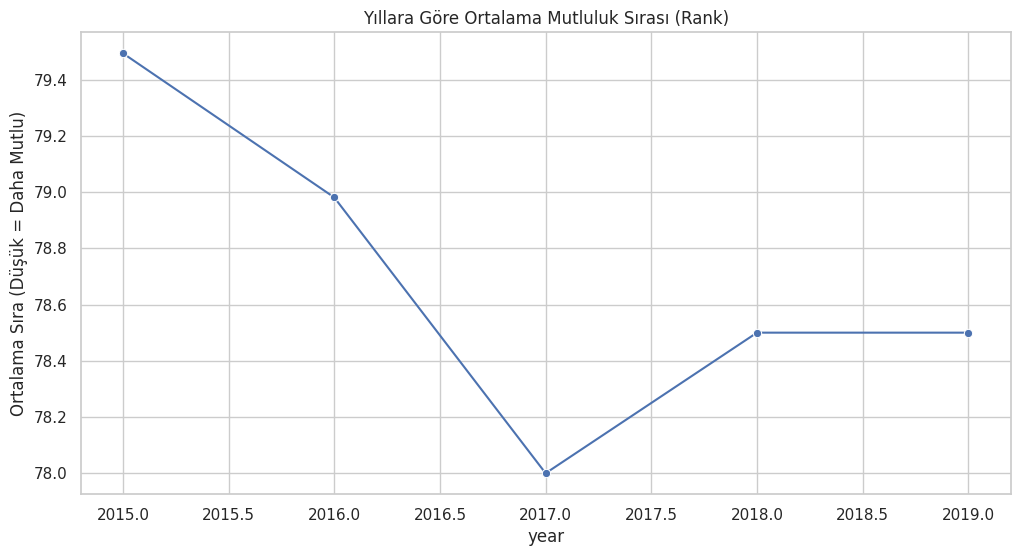

In [22]:
avg_rank = df.groupby("year")["rank"].mean().reset_index()

sns.lineplot(data=avg_rank, x="year", y="rank", marker="o")
plt.title("Yıllara Göre Ortalama Mutluluk Sırası (Rank)")
plt.ylabel("Ortalama Sıra (Düşük = Daha Mutlu)")
plt.show()

2015–2017 arasında dünya genelinde ortalama mutluluk artışı (sıra düşüşü) görülüyor. Ancak 2018 ve 2019’da bu gelişme durmuş ve seviye sabitlenmiş.

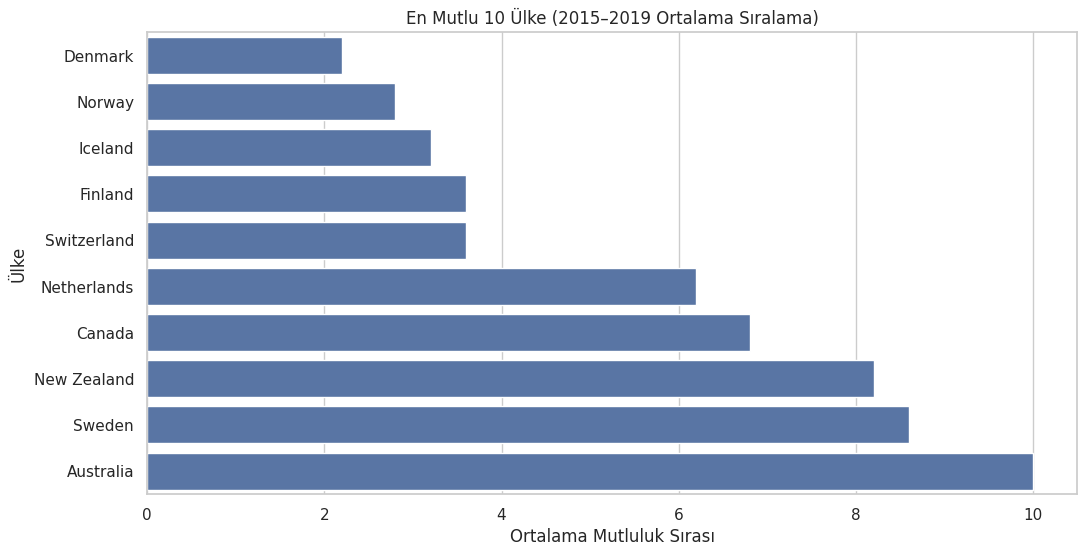

In [23]:
# Ortalama sıralamaya göre en mutlu ülkeler (rank küçük)
top10 = df.groupby("country")["rank"].mean().sort_values().head(10).reset_index()

sns.barplot(data=top10, x="rank", y="country")
plt.title("En Mutlu 10 Ülke (2015–2019 Ortalama Sıralama)")
plt.xlabel("Ortalama Mutluluk Sırası")
plt.ylabel("Ülke")
plt.show()

İskandinav ülkeleri (Danmarka, Norveç, Finlandiya vs.) en mutlu ülkeler listesinde açık ara önde. Bu ülkeler güçlü sosyal sistemlere ve yüksek yaşam kalitesine sahip.

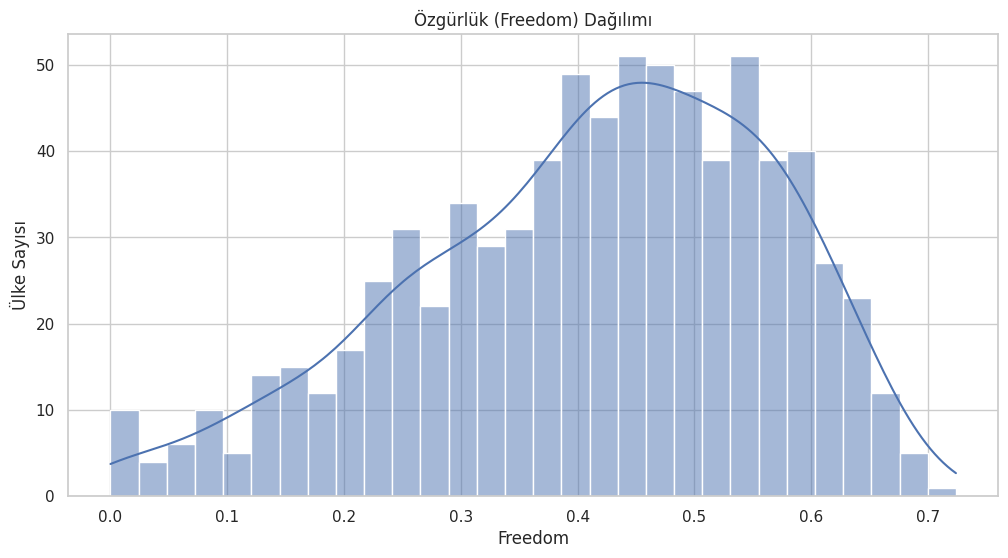

In [24]:
sns.histplot(data=df, x="freedom", bins=30, kde=True)
plt.title("Özgürlük (Freedom) Dağılımı")
plt.xlabel("Freedom")
plt.ylabel("Ülke Sayısı")
plt.show()


Özgürlük değerleri çoğunlukla 0.3–0.6 arasında yoğunlaşmış. Dağılım sağa çarpık; çok düşük özgürlük değerine sahip ülkeler azınlıkta.

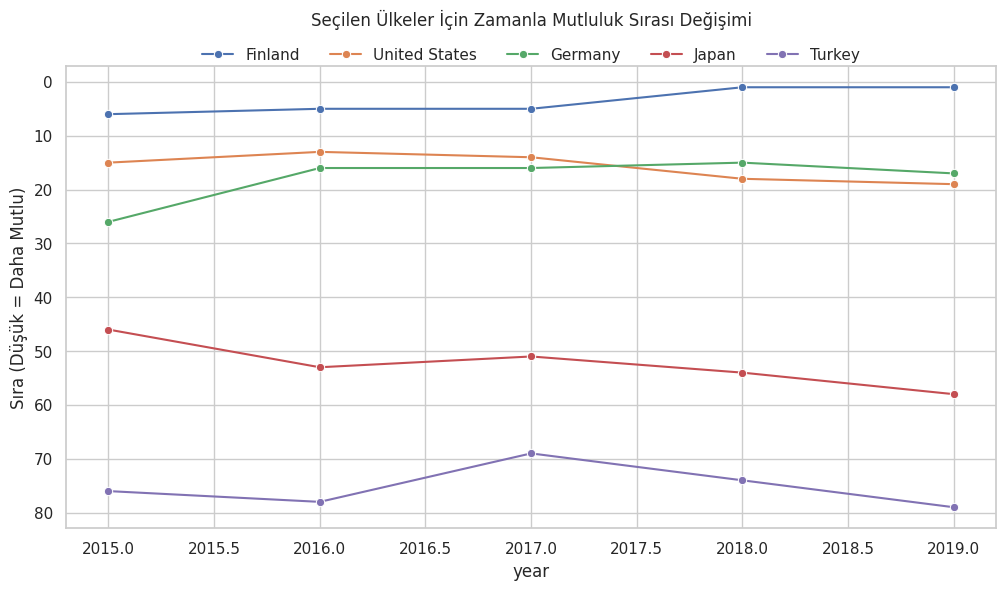

In [32]:
# Örnek ülkeler (istediklerini değiştirebilirsin)
selected_countries = ['Finland', 'Turkey', 'Germany', 'Japan', 'United States']

df_selected = df[df['country'].isin(selected_countries)]

sns.lineplot(data=df_selected, x="year", y="rank", hue="country", marker="o")
plt.title("Seçilen Ülkeler İçin Zamanla Mutluluk Sırası Değişimi", y=1.07)
plt.ylabel("Sıra (Düşük = Daha Mutlu)")
plt.gca().invert_yaxis()  # çünkü 1. sıra en mutlu
plt.legend(frameon= False, ncol=5, loc= 'upper center', bbox_to_anchor=(0.5, 1.07))
plt.grid(True)
plt.show()

Finlandiya, 2017 sonrası istikrarlı şekilde zirvede. Türkiye ise sürekli gerileyerek daha alt sıralara düşmüş. ABD ve Japonya'da da hafif düşüşler gözlemleniyor.



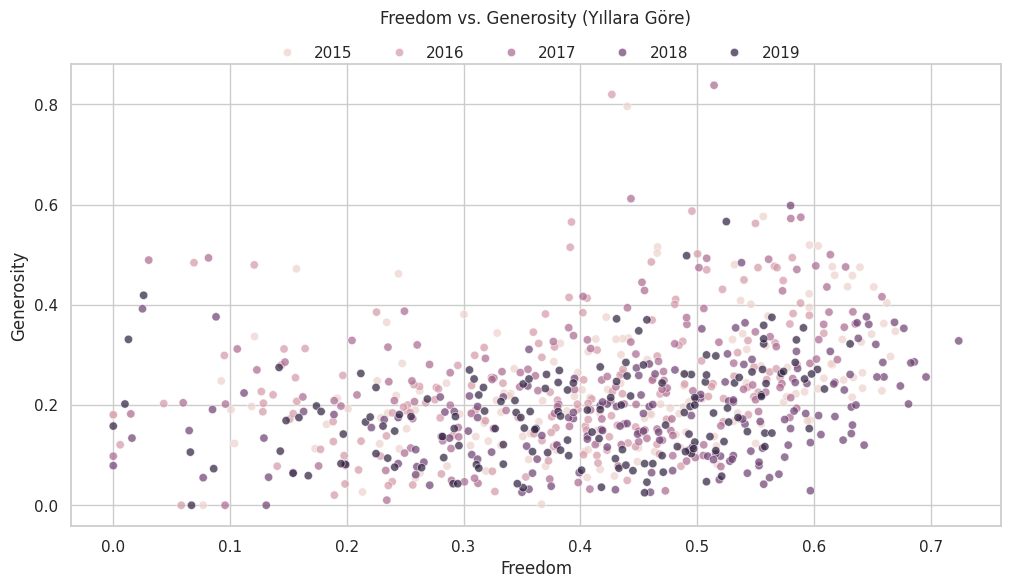

In [35]:
sns.scatterplot(data=df, x="freedom", y="generosity", hue="year", alpha=0.7)
plt.title("Freedom vs. Generosity (Yıllara Göre)", y=1.07)
plt.xlabel("Freedom")
plt.ylabel("Generosity")
plt.legend(frameon=False, ncol=5, loc='upper center', bbox_to_anchor=(0.5, 1.07))
plt.grid(True)
plt.show()

Özgürlük arttıkça cömertliğin de genel olarak arttığı bir eğilim var. Ancak aralarındaki ilişki güçlü değil; yüksek özgürlük her zaman yüksek cömertlik anlamına gelmiyor.

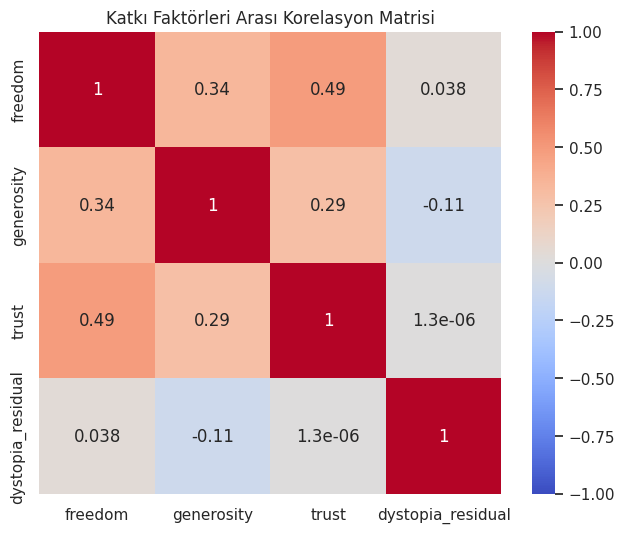

In [36]:
# Korelasyon analizi için sadece sayısal katkı faktörleri
factors = ['freedom', 'generosity', 'trust', 'dystopia_residual']
df_corr = df[factors].dropna()

# Korelasyon matrisi
corr_matrix = df_corr.corr()

# Isı haritası çizimi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Katkı Faktörleri Arası Korelasyon Matrisi")
plt.show()

| Faktörler                         | Korelasyon | Yorum                                                                                                                                                 |
| --------------------------------- | ---------- | ----------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Freedom ↔ Trust**               | **0.49**   | Güçlü ve pozitif bir ilişki. Daha özgür ülkelerde hükümete güven de daha yüksek.                                                                      |
| **Freedom ↔ Generosity**          | 0.34       | Orta düzeyde pozitif ilişki. Özgürlük arttıkça cömertlik de hafif artma eğiliminde.                                                                   |
| **Generosity ↔ Trust**            | 0.29       | Zayıf-orta pozitif ilişki. Güven seviyesi yüksek olan ülkelerde cömertlik biraz daha fazla olabilir.                                                  |
| **Dystopia Residual ↔ Diğerleri** | ≈0         | Dystopia residual, diğer faktörlerle neredeyse bağımsız. Zaten modelde “açıklanamayan mutluluk katkısı” olarak yer aldığı için bu beklenen bir sonuç. |


---
##  **World Happiness Report Veri Analizi – Genel Değerlendirme**

###  **1. Ortalama Mutluluk Sırasının Yıllara Göre Değişimi**

2015–2017 yılları arasında dünya genelinde ülkelerin ortalama mutluluk sıralamaları düşmüş (iyileşmiş), bu da global anlamda bir pozitif eğilimi göstermektedir. Ancak 2018 ve 2019’da bu gelişme duraksamış ve ortalama sırada bir sabitlenme gözlemlenmiştir. Bu durum, bazı ülkelerin gelişme gösterirken bazılarının gerilemesiyle denge sağlandığını düşündürebilir.

---

###  **2. En Mutlu Ülkeler**

2015–2019 yılları arasında en yüksek mutluluk sıralamasına sahip ülkeler ağırlıklı olarak **İskandinav ülkeleridir**: Danimarka, Norveç, Finlandiya, İsveç gibi. Bu ülkelerin ortak özellikleri arasında yüksek düzeyde sosyal destek, özgürlük, düşük yolsuzluk ve güçlü kamu hizmetleri bulunmaktadır.

---

###  **3. Özgürlük Dağılımı**

Freedom (özgürlük) değişkeninin dağılımı incelendiğinde, değerlerin çoğunlukla 0.3–0.6 aralığında toplandığı görülmektedir. Bu da ülkelerin genel olarak orta düzeyde bireysel özgürlük sağladığını gösterir. Çok yüksek ya da çok düşük değerlere sahip ülke sayısı azdır.

---

###  **4. Seçilen Ülkelerde Mutluluk Sırası Değişimi**

Örnek olarak incelenen ülkelerde:

* **Finlandiya**, 2017’den itibaren 1. sıraya yükselmiş ve liderliğini korumuştur.
* **Türkiye** ve **Japonya**, analiz boyunca istikrarlı şekilde alt sıralara gerilemiştir.
* **ABD** ve **Almanya** sıralamalarını büyük oranda korurken küçük dalgalanmalar göstermiştir.

---

###  **5. Freedom vs. Generosity (Yıllara Göre)**

Özgürlük ve cömertlik arasındaki ilişki, yıllara göre tutarlı bir şekilde zayıf pozitif yöndedir. Bu, daha özgür toplumlarda bireylerin diğerlerine yardım etmeye daha yatkın olduğunu gösterse de ilişki oldukça sınırlıdır.

---

###  **6. Katkı Faktörleri Arası Korelasyon Analizi**

Korelasyon matrisine göre:

* En güçlü ilişki **özgürlük (freedom)** ile **güven (trust)** arasındadır (r=0.49). Bu, bireylerin özgür hissettiği ülkelerde hükümete duyulan güvenin daha yüksek olduğunu gösterir.
* **Cömertlik (generosity)** ile diğer faktörler arasında zayıf-orta düzeyde pozitif ilişkiler vardır.
* **Dystopia\_residual** ise diğer faktörlerle korelasyon göstermemektedir. Bu, modelin açıklayamadığı mutluluk bileşenini temsil ettiği için beklenen bir sonuçtur.

---

##  **Genel Sonuç & Öneriler**

Bu analiz, mutluluğun ülkeler arasında ciddi yapısal farklar içerdiğini ve bu farkların özgürlük, güven, sosyal yapı gibi sosyopolitik faktörlerle ilişkili olduğunu ortaya koymaktadır. Verinin daha eksiksiz versiyonu ile ekonomik göstergeler (`gdp_per_capita`, `social_support`, `healthy_life_expectancy`) da analiz edilirse daha kapsamlı çıkarımlar yapılabilir.

---
